In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from IPython.display import clear_output

In [2]:
from IPython.display import clear_output
!wget https://raw.githubusercontent.com/wamanagba/Data/main/Credit_Card_Applications.csv
clear_output()

In [3]:
!ls

Credit_Card_Applications.csv	Credit_Card_Applications.ipynb	som.py
Credit_Card_Applications.csv.1	minisom.py
Credit_Card_Applications.csv.2	__pycache__


In [4]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [6]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

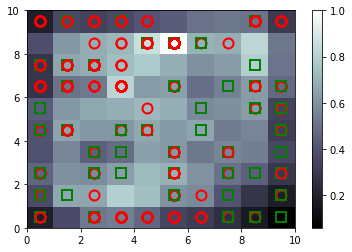

In [7]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [ ]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,8)], mappings[(2,6)]), axis = 0)
frauds = sc.inverse_transform(frauds)